In [5]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import os
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential


In [7]:
(ds_train, ds_validation, ds_test), ds_info = tfds.load(
    
    "patch_camelyon",
    split = ["train", "validation", "test"],
    shuffle_files = True, 
    as_supervised = True,
    with_info = True,  
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteA2GW5C/patch_camelyon-test.tfrecord


  0%|          | 0/32768 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteA2GW5C/patch_camelyon-train.tfrecord


  0%|          | 0/262144 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteA2GW5C/patch_camelyon-validation.tfrecord


  0%|          | 0/32768 [00:00<?, ? examples/s]

Dataset patch_camelyon downloaded and prepared to /root/tensorflow_datasets/patch_camelyon/2.0.0. Subsequent calls will reuse this data.


In [8]:
print(ds_info)

tfds.core.DatasetInfo(
    name='patch_camelyon',
    version=2.0.0,
    description='The PatchCamelyon benchmark is a new and challenging image classification
dataset. It consists of 327.680 color images (96 x 96px) extracted from
histopathologic scans of lymph node sections. Each image is annoted with a
binary label indicating presence of metastatic tissue. PCam provides a new
benchmark for machine learning models: bigger than CIFAR10, smaller than
Imagenet, trainable on a single GPU.',
    homepage='https://patchcamelyon.grand-challenge.org/',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(96, 96, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=327680,
    splits={
        'test': 32768,
        'train': 262144,
        'validation': 32768,
    },
    supervised_keys=('image', 'label'),
    citation="""@misc{b_s_veeling_j_linmans_j_winkens_t_cohen_2018_

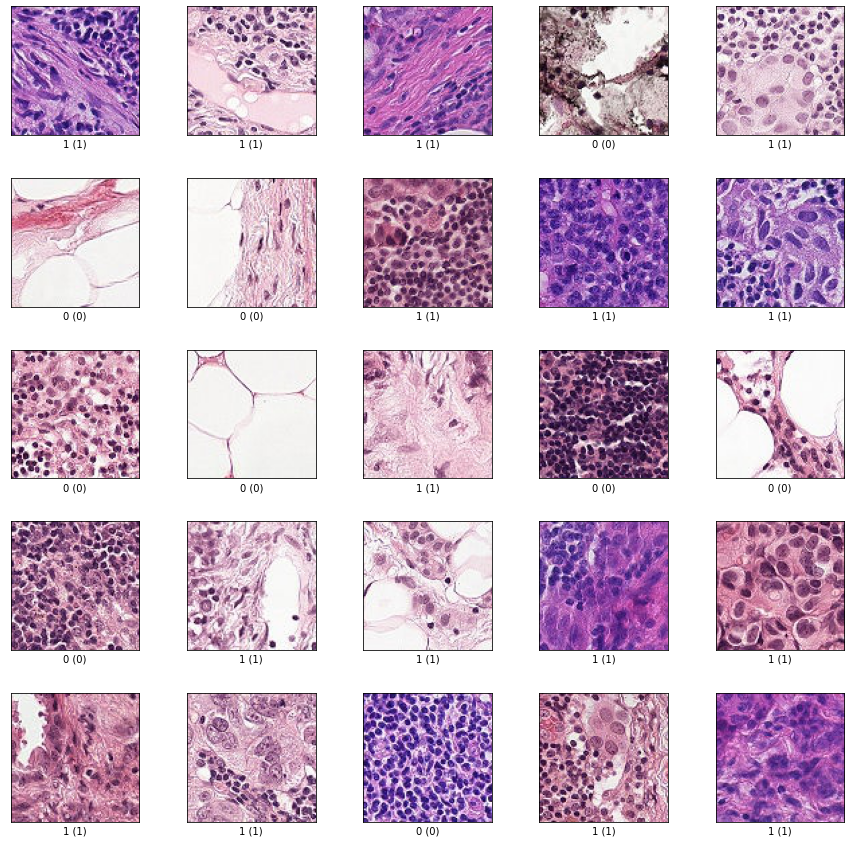

In [10]:
fig = tfds.show_examples(ds_train, ds_info, rows = 5, cols = 5)

In [11]:
# Normalize the images
def normalize(image, label):
  return tf.cast(image, tf.float16)/255.0, label

In [12]:
def augm(image_label, seed):
  image, label = image_label
  image, label = normalize(image, label)
  return image, label

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 16

In [14]:
counter = tf.data.experimental.Counter()
ds_train = tf.data.Dataset.zip((ds_train, (counter, counter)))

In [23]:
ds_train = ds_train.map(normalize, num_parallel_calls = AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)

ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)

In [20]:
ds_validation = ds_validation.map(normalize, num_parallel_calls = AUTOTUNE)
ds_validation = ds_validation.batch(32)
ds_validation = ds_validation.prefetch(AUTOTUNE)

In [21]:
ds_test = ds_test.map(normalize, num_parallel_calls = AUTOTUNE)
ds_test = ds_test.batch(32)
ds_test = ds_test.prefetch(AUTOTUNE)

In [24]:
# Will stop the training/validation if the model does not improve accuracy in 5 consecutive epochs.
callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 5, verbose = 1)]

In [ ]:
# Train on the taining data and run it on the validation ds.

In [ ]:
#